In [2]:
import numpy as np
import matplotlib.pyplot as plt

from rough_bergomi.models import RoughBergomiModel, GBMModel, HestonModel
from rough_bergomi.utils.utils import bs_delta, bsinv, bs  # Black-Scholes inversion for IV calculation
import seaborn as sns
import yfinance as yf

from rough_bergomi.hedging.deep_hedger import DeepHedgerTF
from rough_bergomi.utils.plotting import plot_paths 

Simulating for H = 0.1
Simulating for H = 0.2
Simulating for H = 0.3
Simulating for H = 0.4


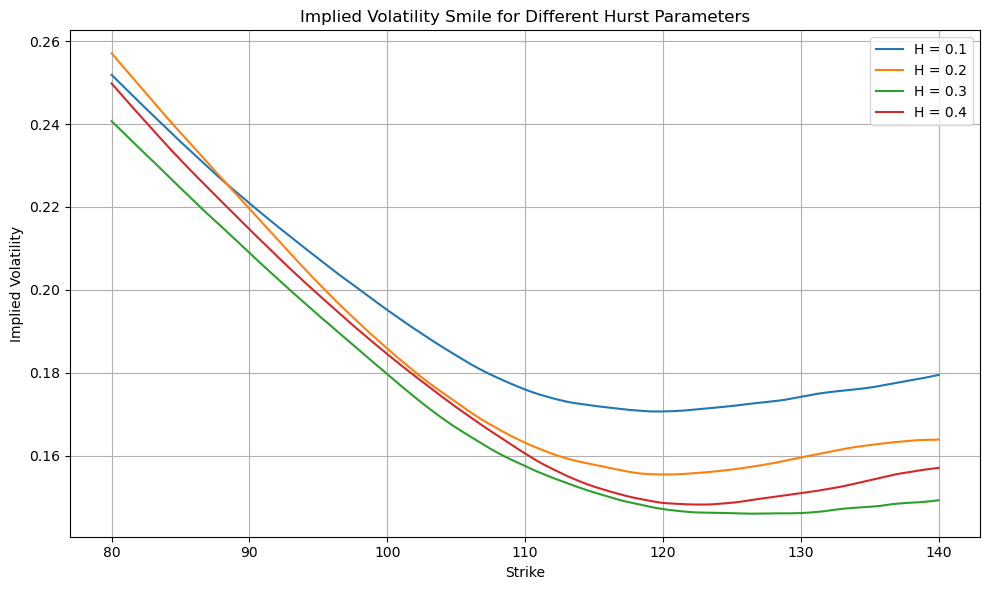

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters
T = 1.0
N = 100
M = 2500
S0 = 100.0
r = 0
strikes = np.linspace(80, 140, 1000)

H_values = [0.1, 0.2, 0.3, 0.4]
implied_vols_by_H = {}

for H in H_values:
    print(f"Simulating for H = {H}")
    model = RoughBergomiModel(H=H, fbm_method="hybrid")
    S, V = model.simulate_paths(n_paths=M, n_steps=N, T=T, S0=S0)
    
    implied_vols = []
    for k in strikes:
        price = model.price_european(S, k, T, r)
        iv = bsinv(price, S0, k, T, r)  # Use your actual implied vol function here
        implied_vols.append(iv)
    
    implied_vols_by_H[H] = implied_vols

# Plot smiles
plt.figure(figsize=(10, 6))
for H in H_values:
    plt.plot(strikes, implied_vols_by_H[H], label=f'H = {H}')
plt.title('Implied Volatility Smile for Different Hurst Parameters')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# 1. Locate the ATM strike index (closest to S0)
atm_idx = np.argmin(np.abs(strikes - S0))

# 2. Compute ATM skew for each H via central difference
atm_skews = []
for H in H_values:
    iv_curve = np.array(implied_vols_by_H[H])
    dσ = iv_curve[atm_idx+1] - iv_curve[atm_idx-1]
    dK = strikes[atm_idx+1] - strikes[atm_idx-1]
    atm_skews.append(dσ / dK)

# 3. Build a DataFrame
df = pd.DataFrame({
    'Hurst exponent $H$': H_values,
    'ATM skew ($\\partial\\sigma/\\partial K$ at $K=100$)': atm_skews
})

# 4. Export to LaTeX
latex_table = df.to_latex(
    index=False,
    float_format="%.6f",
    caption="ATM skew vs Hurst exponent",
    label="tab:atm_skew",
    column_format="lc"
)

print(latex_table)

\begin{table}
\caption{ATM skew vs Hurst exponent}
\label{tab:atm_skew}
\begin{tabular}{lc}
\toprule
Hurst exponent $H$ & ATM skew ($\partial\sigma/\partial K$ at $K=100$) \\
\midrule
0.100000 & -0.000429 \\
0.200000 & -0.000627 \\
0.300000 & -0.001195 \\
0.400000 & -0.000676 \\
\bottomrule
\end{tabular}
\end{table}



Simulating for ρ = -0.9
Simulating for ρ = -0.6
Simulating for ρ = -0.3
Simulating for ρ = 0


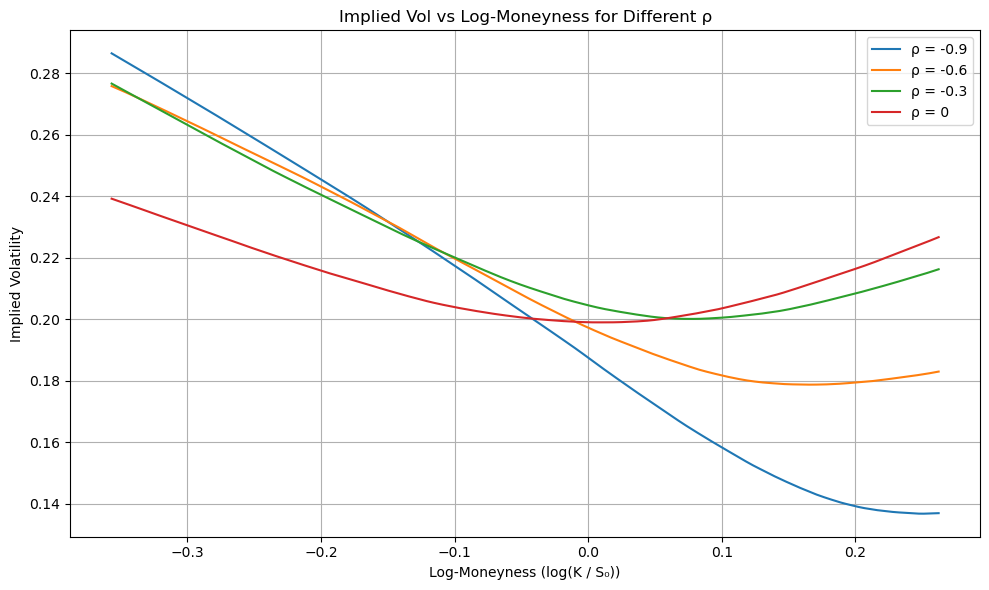

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1.0
N = 100
M = 5_000
S0 = 100.0
r = 0
strikes = np.linspace(70, 130, 1000)
rho_values = [-0.9, -0.6, -0.3, 0]

implied_vols_by_rho = {}

for rho in rho_values:
    print(f"Simulating for ρ = {rho}")
    model = RoughBergomiModel(rho=rho, fbm_method="hybrid")
    S, V = model.simulate_paths(n_paths=M, n_steps=N, T=T, S0=S0)

    implied_vols = []
    for k in strikes:
        price = model.price_european(S, k, T, r)
        iv = bsinv(price, S0, k, T, r)  # Make sure bsinv is defined and working
        implied_vols.append(iv)
    
    implied_vols_by_rho[rho] = implied_vols

# Compute log-moneyness
log_moneyness = np.log(strikes / S0)

# Plot the volatility smiles against log-moneyness
plt.figure(figsize=(10, 6))
for rho in rho_values:
    plt.plot(log_moneyness, implied_vols_by_rho[rho], label=f"ρ = {rho}")

plt.title("Implied Vol vs Log-Moneyness for Different ρ")
plt.xlabel("Log-Moneyness (log(K / S₀))")
plt.ylabel("Implied Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Simulating for η = 1.0
Simulating for η = 1.5
Simulating for η = 2.0
Simulating for η = 2.5


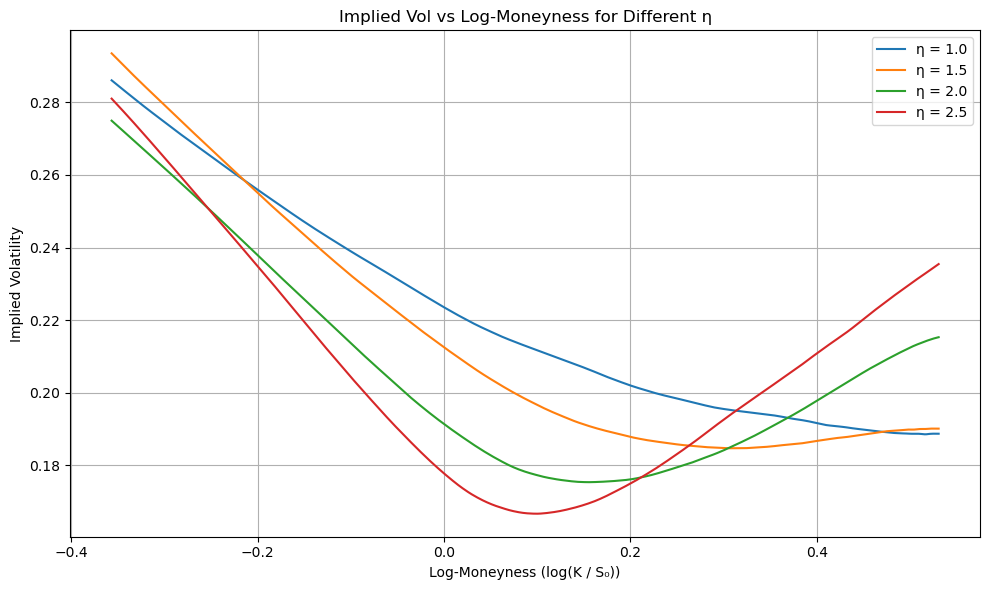

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1.0
N = 100
M = 10_000
S0 = 100.0
r = 0
strikes = np.linspace(70, 170, 1000)
eta_values = [1.0, 1.5, 2.0, 2.5]  # example eta values
rho = -0.6  # fixed rho value

implied_vols_by_eta = {}

for eta in eta_values:
    print(f"Simulating for η = {eta}")
    model = RoughBergomiModel(eta=eta, rho=rho, fbm_method="hybrid")
    S, V = model.simulate_paths(n_paths=M, n_steps=N, T=T, S0=S0)

    implied_vols = []
    for k in strikes:
        price = model.price_european(S, k, T, r)
        iv = bsinv(price, S0, k, T, r)  # Ensure bsinv is defined and accurate
        implied_vols.append(iv)
    
    implied_vols_by_eta[eta] = implied_vols

# Compute log-moneyness
log_moneyness = np.log(strikes / S0)

# Plot the volatility smiles against log-moneyness
plt.figure(figsize=(10, 6))
for eta in eta_values:
    plt.plot(log_moneyness, implied_vols_by_eta[eta], label=f"η = {eta}")

plt.title("Implied Vol vs Log-Moneyness for Different η")
plt.xlabel("Log-Moneyness (log(K / S₀))")
plt.ylabel("Implied Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Simulating for ρ = -0.9, η = 1.111
Simulating for ρ = -0.6, η = 1.667
Simulating for ρ = -0.3, η = 3.333
Simulating for ρ = 0.3, η = -3.333
Simulating for ρ = 0.6, η = -1.667
Simulating for ρ = 0.9, η = -1.111


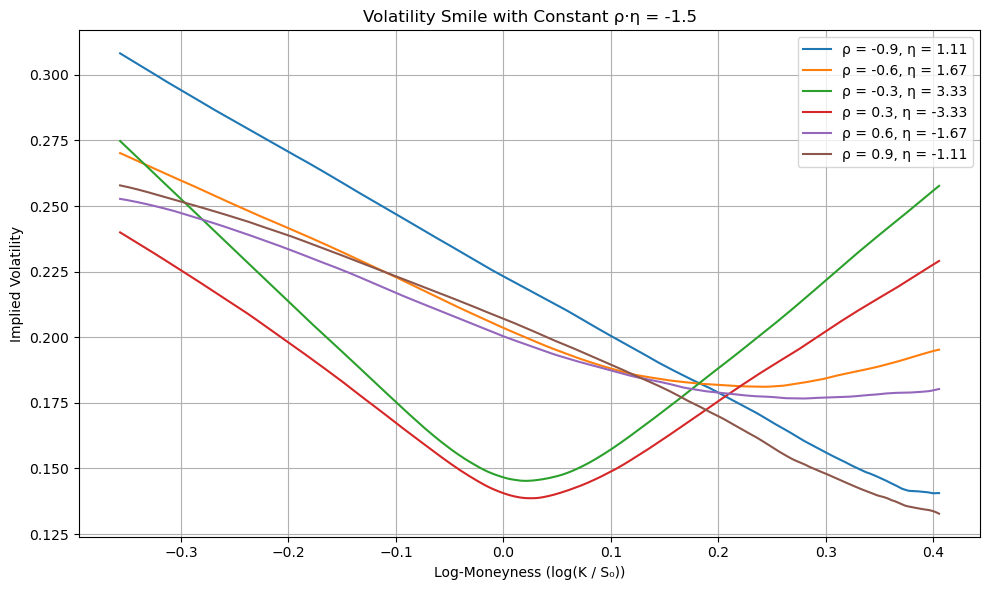

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1.0
N = 100
M = 2500
S0 = 100.0
r = 0
strikes = np.linspace(70, 150, 1000)

rho_values = [-0.9, -0.6, -0.3]  # Varying rho
target_product = -1  # Keep rho * eta = -1.5 constant

implied_vols_by_rho = {}

for rho in rho_values:
    eta = target_product / rho  # Adjust eta to maintain constant product
    print(f"Simulating for ρ = {rho}, η = {eta:.3f}")
    
    model = RoughBergomiModel(eta=eta, rho=rho, fbm_method="hybrid")
    S, V = model.simulate_paths(n_paths=M, n_steps=N, T=T, S0=S0)

    implied_vols = []
    for k in strikes:
        price = model.price_european(S, k, T, r)
        iv = bsinv(price, S0, k, T, r)  # Ensure bsinv is stable
        implied_vols.append(iv)
    
    implied_vols_by_rho[rho] = implied_vols

# Compute log-moneyness
log_moneyness = np.log(strikes / S0)

# Plot the volatility smiles against log-moneyness
plt.figure(figsize=(10, 6))
for rho in rho_values:
    plt.plot(log_moneyness, implied_vols_by_rho[rho], label=f"ρ = {rho}, η = {target_product/rho:.2f}")

plt.title("Volatility Smile with Constant ρ·η = -1.5")
plt.xlabel("Log-Moneyness (log(K / S₀))")
plt.ylabel("Implied Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

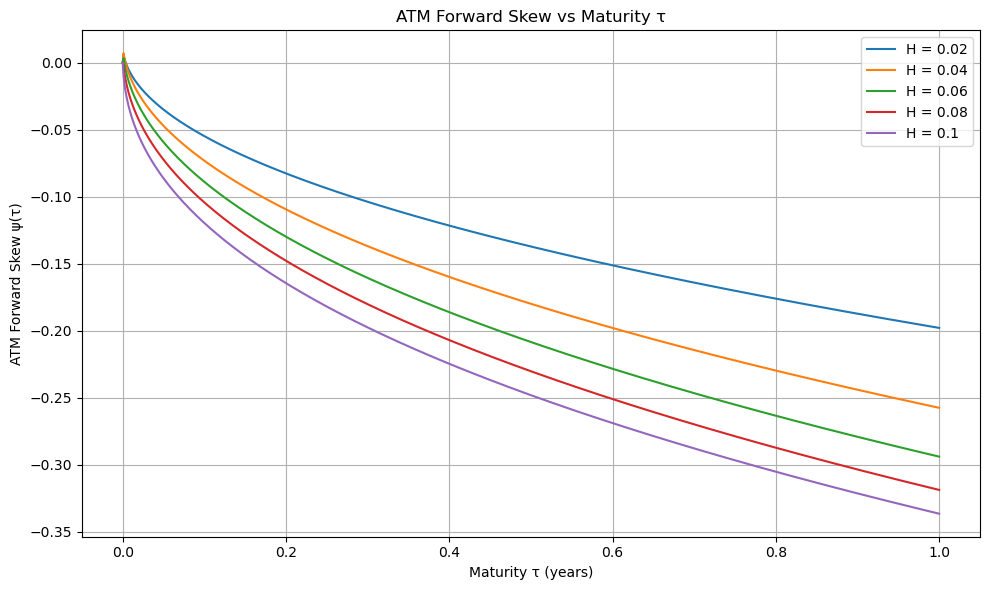

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Model parameters
rho = -0.9
eta = 1.9
sigma_bar = np.sqrt(0.06)

# Time to maturity (in years)
taus = np.linspace(0, 1.0, 1000)  # from 5 business days to 1 year

# Hurst exponents to explore
H_values = [0.02, 0.04, 0.06, 0.08,0.1]

def compute_D_H(H):
    return np.sqrt(2 * H) / (H + 0.5)

def compute_E_H(H, D_H):
    return D_H / (H + 1.5)

def psi_forward_skew(H, tau):
    D_H = compute_D_H(H)
    E_H = compute_E_H(H, D_H)
    gamma_ratio = gamma(H + 1.5)**2 / gamma(2 * H + 3)
    
    first_term = 0.5 * rho * eta * E_H * tau**(0.5 - H)
    
    correction = (
        (D_H**2 / (1 + H)) * (1 + gamma_ratio) - 1.5 * E_H**2
    )
    second_term = 0.25 * rho**2 * eta**2 * sigma_bar * tau**(2 * H) * correction
    
    return first_term + second_term

# Plotting
plt.figure(figsize=(10, 6))

for H in H_values:
    skew_values = [psi_forward_skew(H, tau) for tau in taus]
    plt.plot(taus, skew_values, label=f"H = {H}")

plt.title("ATM Forward Skew vs Maturity τ")
plt.xlabel("Maturity τ (years)")
plt.ylabel("ATM Forward Skew ψ(τ)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

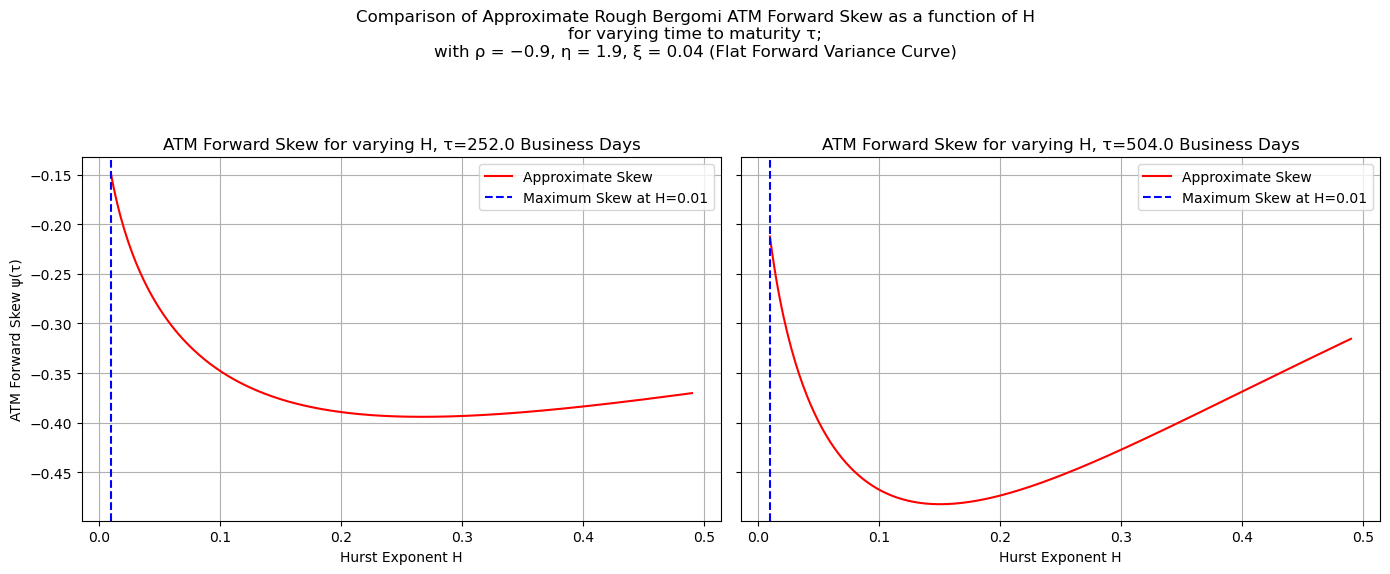

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Model parameters
rho = -0.9
eta = 1.9
sigma_bar_squared = 0.04  # flat forward variance: ξ₀(u) = σ̄²

# Time to maturities (5 and 10 business days in years)
tau_values = [1, 2]

# Hurst exponent values to evaluate
H_values = np.linspace(0.01, 0.49, 300)

def atm_forward_skew(H, tau):
    # Compute D_H and E_H as per Eq 9.1.1
    D_H = np.sqrt(2 * H) / (H + 0.5)
    E_H = D_H / (H + 1.5)
    
    # First-order term
    first_term = (rho * eta / 2) * E_H * tau ** (0.5 - H)
    
    # Second-order correction term
    gamma_term = (gamma(H + 1.5) ** 2) / gamma(2 * H + 3)
    correction = (D_H ** 2 / (1 + H)) * (1 + gamma_term) - 1.5 * (E_H ** 2)
    second_term = 0.25 * (rho ** 2) * (eta ** 2) * np.sqrt(sigma_bar_squared) * tau ** (2 * H) * correction
    
    return first_term + second_term

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, tau in enumerate(tau_values):
    skew_vals = [atm_forward_skew(H, tau) for H in H_values]
    
    axs[i].plot(H_values, skew_vals, color='red', label='Approximate Skew')
    
    # Mark maximum skew point
    max_index = np.argmax(skew_vals)
    max_H = H_values[max_index]
    axs[i].axvline(max_H, color='blue', linestyle='--', label=f'Maximum Skew at H={max_H:.2f}')
    
    axs[i].set_title(f'ATM Forward Skew for varying H, τ={tau*252:.1f} Business Days')
    axs[i].set_xlabel('Hurst Exponent H')
    axs[i].grid(True)
    axs[i].legend()

axs[0].set_ylabel('ATM Forward Skew ψ(τ)')
fig.suptitle('Comparison of Approximate Rough Bergomi ATM Forward Skew as a function of H\nfor varying time to maturity τ;\nwith ρ = −0.9, η = 1.9, ξ = 0.04 (Flat Forward Variance Curve)', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()